# Análisis exploratorio en la base "Salarios de trabajos de ciencia de datos"

* **Proyecto**: Salarios de trabajos de ciencia de datos
* Autor: Ricardo Rivas G.
  * [GitHub](https://github.com/richistron)
  * [Linkedin](https://www.linkedin.com/in/richistron/)
* [Código fuente](https://github.com/richistron/ds-bootcamp)
* [Dataset](https://drive.google.com/file/d/1xEGMqIMDPZK-7yte8u3vnYyKB--J-x0s/view)

# Índice

* [Librerías](#Librerías)
* [Carga de datos](#Carga-de-datos)
* [Comprensión de los datos](#Comprensión-de-los-datos)
  * [Head](#Head)
  * [Info](#Info)
  * [Describe](#Describe)
  * [Columns](#Columns)
  * [Dtypes](#Dtypes)
  * [Isnull](#Isnull)
  * [Shape](#Shape)
  * [Value Counts](#Value-Counts)
* [Información de las columnas](#Información-de-las-columnas)
* [Matriz de correlación](#Matriz-de-correlación)
* [Gráficas de datos](#Gráficas-de-datos)
  * [Gráficas de pandas](#Gráficas-de-pandas)
  * [Gráficas de seaborn y matplotlib](#Gráficas-de-seaborn-y-matplotlib)

# Librerías

Importamos las librerías necesarias para el análisis de los datos.

In [164]:
import pandas as pd
import seaborn as sb
from pandas import Series
import matplotlib.pyplot as plot

# Carga de datos

Cargamos los datos desde el archivo `ds_salaries.csv` y mostramos los primeros registros.

In [165]:
# TODO, cargar los datos desde google collab
df = pd.read_csv("ds_salaries.csv", index_col=[0])

# Comprensión de los datos

El objetivo principal es entender que datos tenemos en la base. Para ello, utilizamos varios métodos y atributos de pandas.

## Head

El método **head(int)** regresa los primeros registros de la base. Toma una parametro entero para indicar el número de registros a mostrar.

In [166]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


## Info

**info()** regresa información de la base, como el número de columnas, el número de registros, el tipo de dato de cada columna y el número de valores nulos.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


## Describe

**describe()** regresa un resumen estadístico de la base. **transpose()** es para invertir las columnas por filas.

In [168]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


## Columns

**columns** regresa el nombre de las columnas de la base.

In [169]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Dtypes

**dtypes** regresa el tipo de dato de cada columna.

In [170]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## Isnull

**isnull()** regresa el número de valores nulos por columna. **sum** regresa el total de valores nulos en la base.

In [171]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Shape

**shape** regresa un tuple con el número de filas y columnas

In [172]:
print("Número de filas %s y número de columnas %s" % df.shape)

Número de filas 607 y número de columnas 11


## Value Counts

**value_counts()** regresa el número de veces que se repite un valor en una columna.

In [173]:
unique = {i: df[i].value_counts().shape[0] for i in df.columns}
pd.DataFrame(unique, index=["unique"]).transpose()

,unique
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


# Información de las columnas

| Columna            | Descripción             |
|--------------------|-------------------------|
| work_year          | Año toma de datos       |
| experience_level   | Nivel de experiencia    |
| employment_type    | Tipo de puesto          |
| job_title          | Título del empleo       |
| salary             | Salario en moneda local |
| salary_currency    | Moneda de salario       |
| salary_in_usd      | Salario en dólares      |
| employee_residence | Pais de residencia      |
| remote_ratio       | Porcentaje remoto       |
| company_location   | País de la compañia     |
| company_size       | Tamaño de la compañia   |

# Matriz de correlación

Para la matriz de correlación es necesario que las columnas sean numéricas. Por lo tanto, usaremos solo ciertas columnas para esta matriz.

<Axes: >

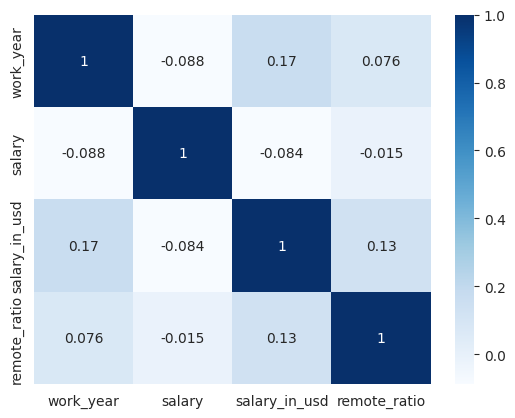

In [174]:
correlacion = df.corr(method="pearson", numeric_only=True)
sb.heatmap(correlacion, cmap="Blues", annot=True)


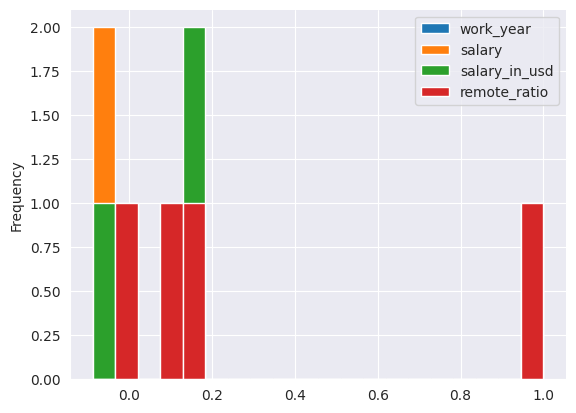

In [175]:
correlacion.plot(kind='hist', bins=20)
plot.gca().spines[['top', 'right',]].set_visible(False)

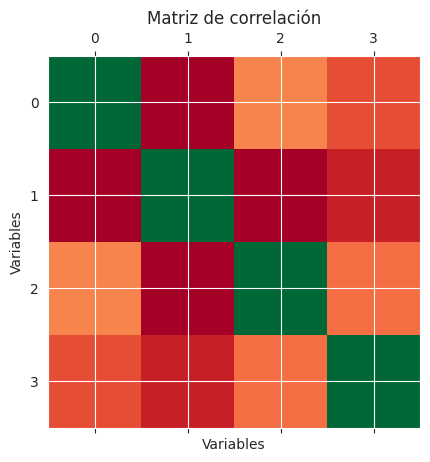

In [176]:
plot.matshow(correlacion, cmap='RdYlGn')
plot.title('Matriz de correlación')
plot.xlabel('Variables')
plot.ylabel('Variables')
plot.show()

# Diagrama de dispersión entre el año de trabajo y el salario en USD

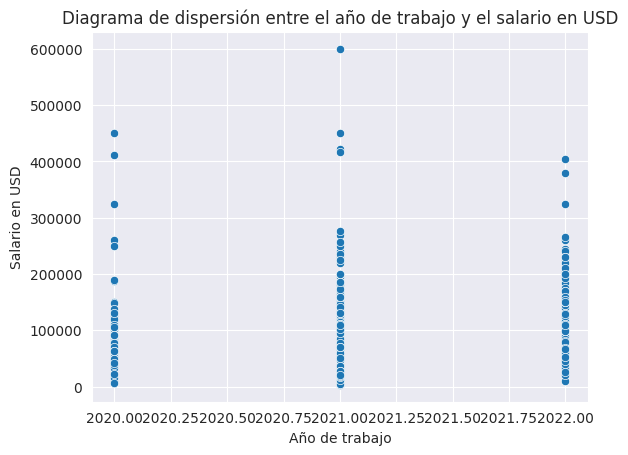

In [177]:
sb.scatterplot(x='work_year', y='salary_in_usd', data=df)
plot.xlabel('Año de trabajo')
plot.ylabel('Salario en USD')
plot.title('Diagrama de dispersión entre el año de trabajo y el salario en USD')
plot.show()

# Diagrama de caja y bigotes de salarios en USD por país

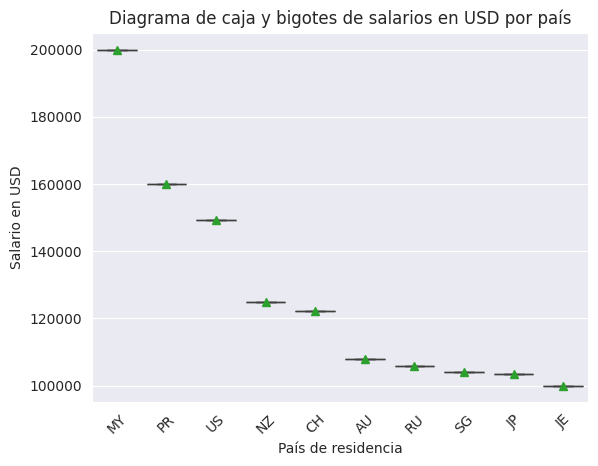

In [178]:
sb.boxplot(x='employee_residence', y='salary_in_usd', showmeans=True, data=df.groupby('employee_residence')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False).head(10))
plot.xlabel('País de residencia')
plot.ylabel('Salario en USD')
plot.title('Diagrama de caja y bigotes de salarios en USD por país')
plot.xticks(rotation=45)
plot.show()

# Gráficas de datos

Generamos gráficas para entender mejor los datos. Utilizaremos las librerías de pandas, seaborn y matplotlib.

## Gráficas de pandas

### Nivel de experiencia

<Axes: xlabel='experience_level'>

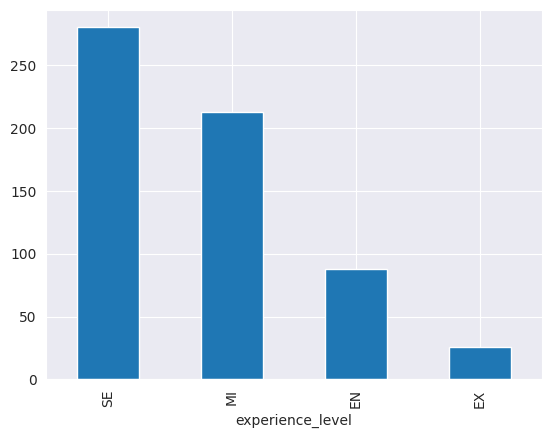

In [179]:
df["experience_level"].value_counts().plot.bar()

### Media de salario agrupado por columna

Vamos a graficar el salario en dólares, por lo que esta función será util para el análisis.

In [180]:
def media_salario_por_columna(columna: str) -> Series:
    return df.groupby(columna)["salary_in_usd"].mean()

### Salario por nivel de experiencia

<Axes: xlabel='experience_level'>

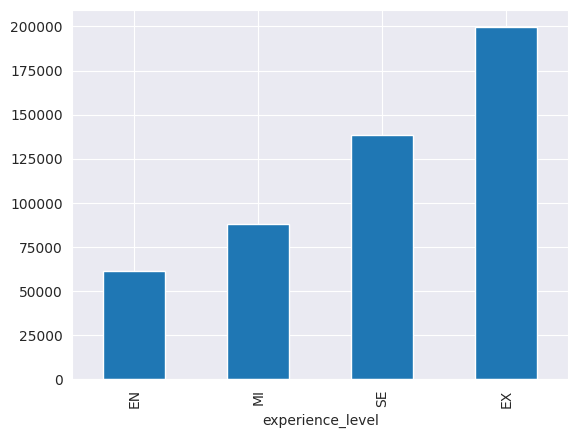

In [181]:
media_salario_por_columna("experience_level").sort_values().plot.bar()

### 10 países con mayor salario

<Axes: xlabel='company_location'>

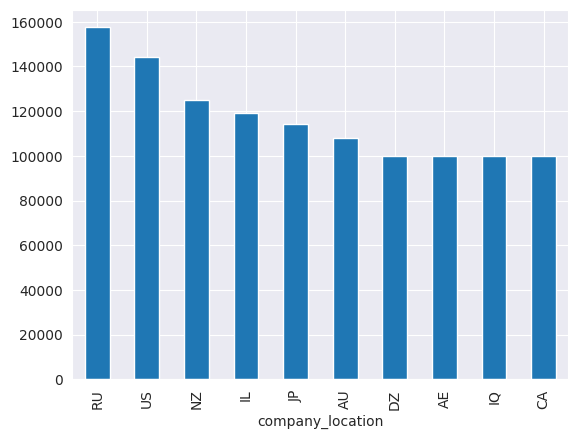

In [182]:
media_de_salarios_location = media_salario_por_columna("company_location").sort_values(
    ascending=False
)
media_de_salarios_location.head(10).plot.bar()

### 10 países con peor salario

<Axes: xlabel='company_location'>

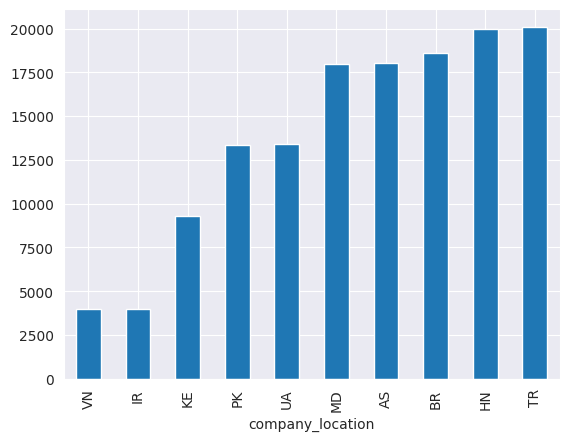

In [183]:
media_de_salarios_location.tail(10).sort_values().plot.bar()

### Salario por company size

<Axes: xlabel='company_size'>

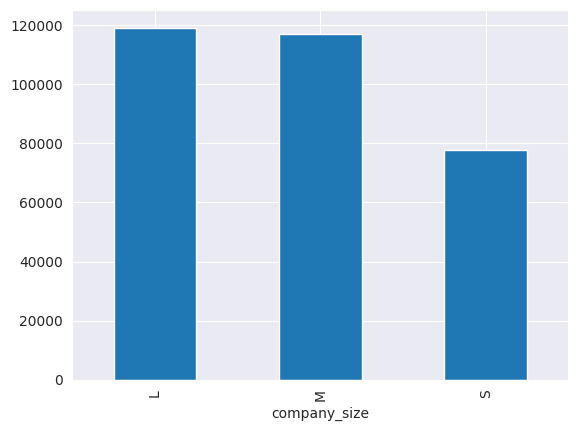

In [184]:
media_salario_por_columna("company_size").plot.bar()

### Salario por remote ratio

<Axes: xlabel='remote_ratio'>

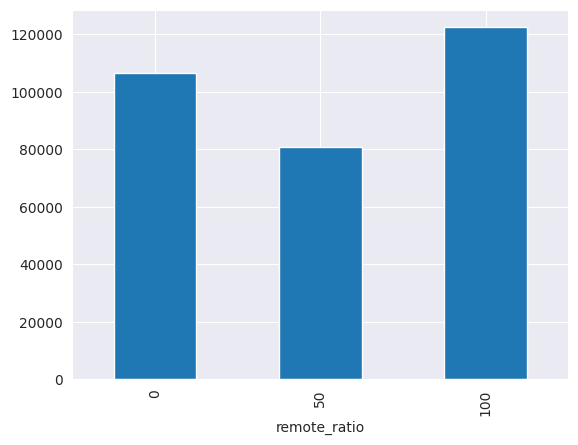

In [185]:
media_salario_por_columna("remote_ratio").plot.bar()

### Salario por remote ratio (frecuencia)

<Axes: ylabel='Frequency'>

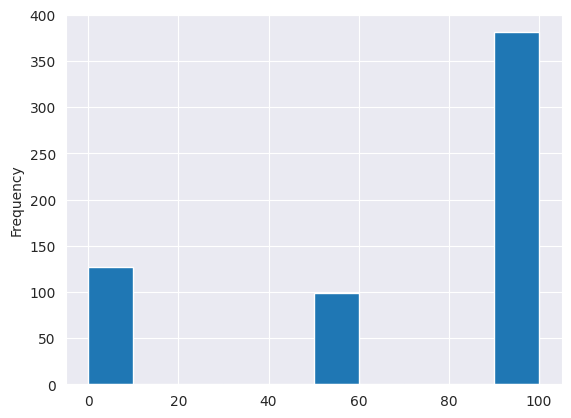

In [186]:
df["remote_ratio"].plot.hist()

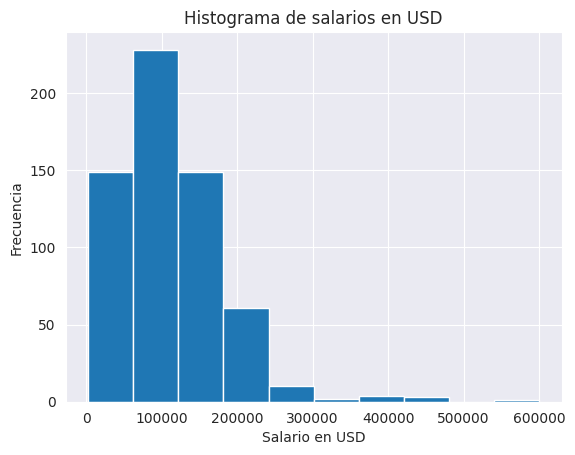

In [187]:
plot.hist(df['salary_in_usd'])
plot.xlabel('Salario en USD')
plot.ylabel('Frecuencia')
plot.title('Histograma de salarios en USD')
plot.show()

### Salario por residencia

<Axes: xlabel='employee_residence'>

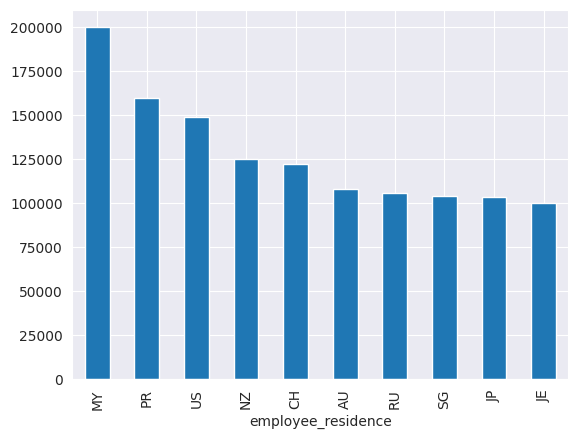

In [188]:
media_salarios_residencia = media_salario_por_columna("employee_residence").sort_values(
    ascending=False
)
media_salarios_residencia.head(10).plot.bar()


### Salario por residencia (worst 10)

<Axes: xlabel='employee_residence'>

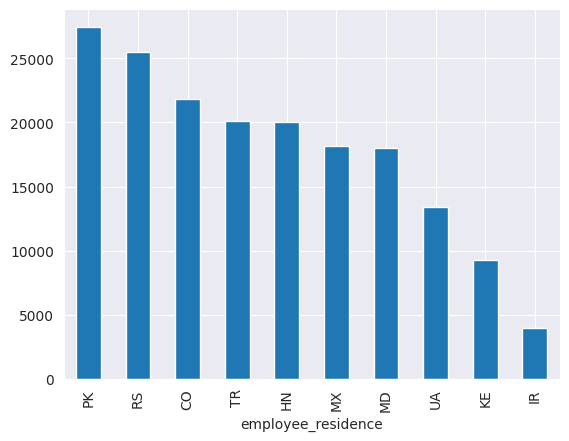

In [189]:
media_salarios_residencia.tail(10).plot.bar()

### Salario por tipo de empleo

<Axes: xlabel='job_title'>

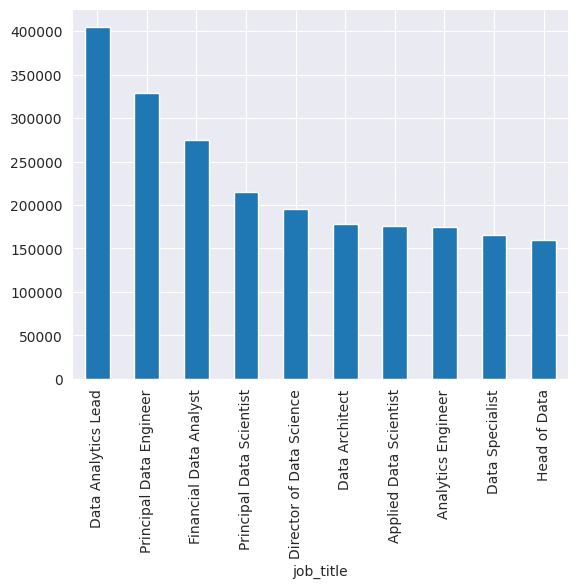

In [190]:
media_salarios_por_titulo = media_salario_por_columna("job_title").sort_values(
    ascending=False
)
media_salarios_por_titulo.head(10).plot(kind="bar")

### Salario por tipo de empleo (peor)

<Axes: xlabel='job_title'>

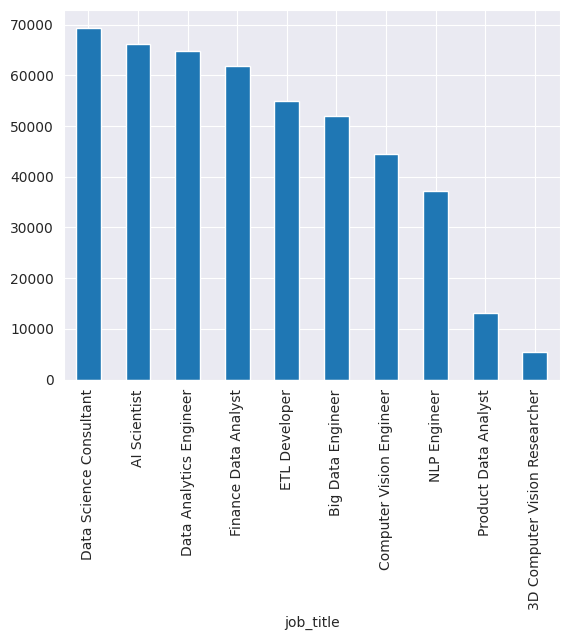

In [191]:
media_salarios_por_titulo.tail(10).plot(kind="bar")

### Salario por work_year

<Axes: xlabel='work_year'>

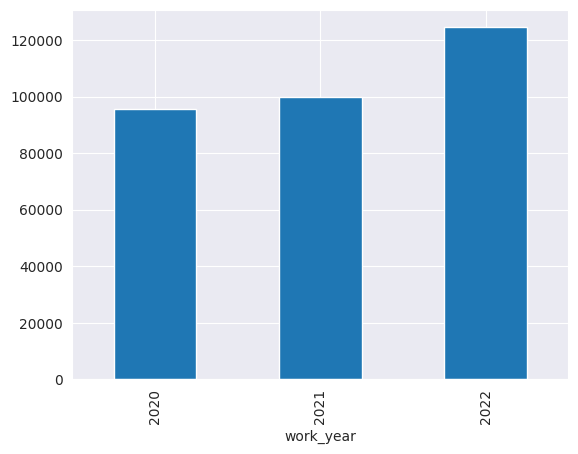

In [192]:
media_salario_por_columna("work_year").plot(kind="bar")

## Gráficas de seaborn y matplotlib

A continuación, se muestran algunas gráficas de seaborn.

Antes de comenzar:

* Vamos a convertir la columna `salary_in_usd` a miles de dólares para que sea más legible.
* Vamos a crear funciones para graficar los datos:
  * `grafica_salario_por_columna(columna: str) -> None`: Grafica el salario en miles de dólares por una columna.
  * `grafica_salario_por_columna_top(columna: str) -> None`: Grafica el salario en miles de dólares por una columna y regresa los 10 valores más altos.


In [193]:
df_copy = df.copy()
df_copy['salary_in_usd'] = df_copy['salary_in_usd'] / 1000

def grafica_salario_por_columna(columna: str) -> None:
    graph = sb.barplot(x=columna, y="salary_in_usd", data=df_copy)
    graph.set(ylabel="Salario en miles de dólares")
    graph.bar_label(graph.containers[0])
    plot.show()

def grafica_salario_por_columna_top(columna: str) -> None:
    data = df_copy.groupby(columna)["salary_in_usd"].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
    graph = sb.barplot(x=columna, y="salary_in_usd", data=data.head(10))
    graph.set(ylabel="Salario en miles de dólares")
    graph.bar_label(graph.containers[0])
    plot.show()

### Salario por nivel de experiencia (seaborn)

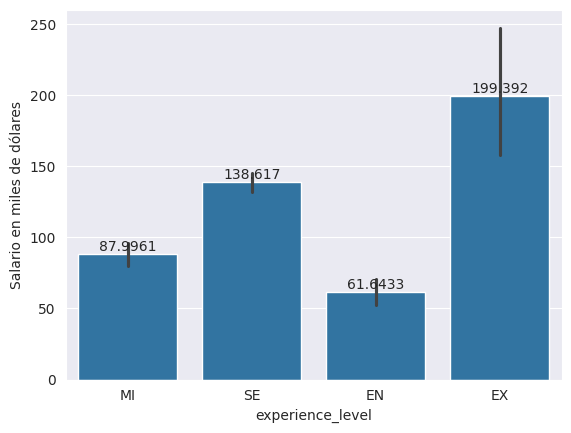

In [194]:
grafica_salario_por_columna("experience_level")

### Salario por tamaño de la compañía (seaborn)

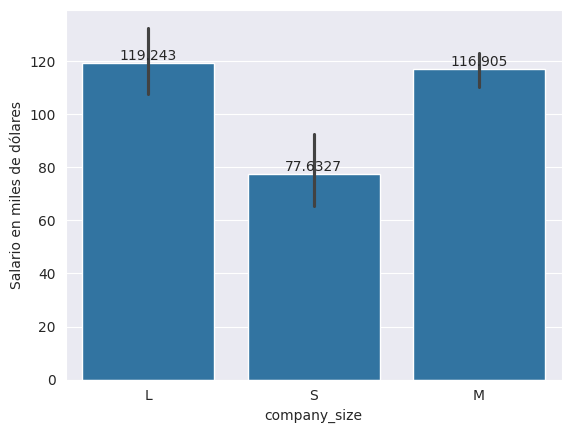

In [195]:
grafica_salario_por_columna("company_size")


### Salario por remote ratio (seaborn)

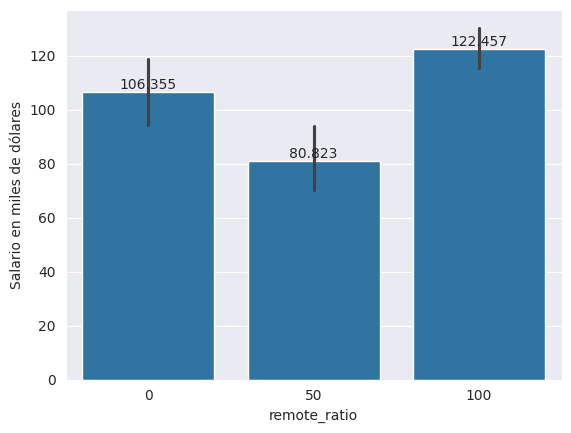

In [196]:
grafica_salario_por_columna("remote_ratio")


### Salario por residencia (seaborn)

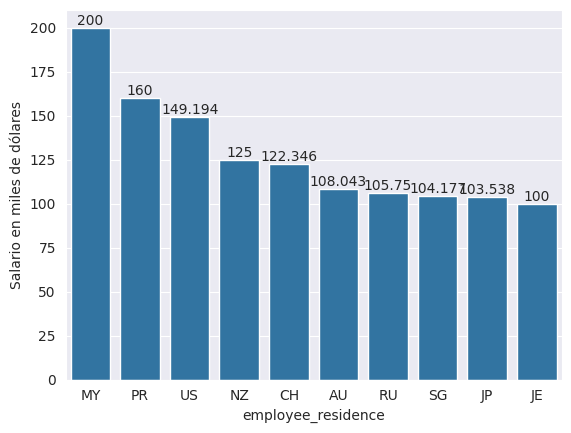

In [197]:
grafica_salario_por_columna_top("employee_residence")

### Salario por tipo de empleo (seaborn)

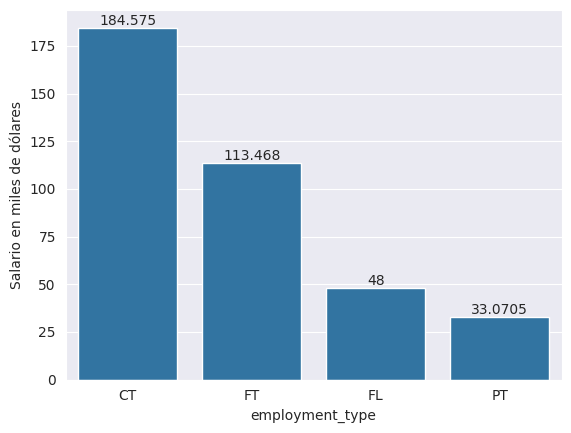

In [198]:
grafica_salario_por_columna_top("employment_type")


### Salario por work_year (seaborn)

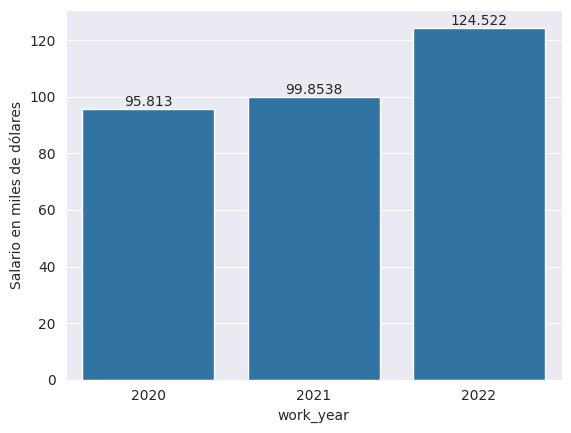

In [199]:
grafica_salario_por_columna_top("work_year")


# Conclusiones

De los datos presentados podemos observar como ciertos salario cambian en relación a las variables. Por lo tanto podemos hacer la siguientes afirmaciones:

* Los mejores pagados, son los empleados con nivel experto, con una media de sueldo de 199,000 USD.
* El nivel de experiencia entry es el peor pagado, con un salario medio de 61,000 USD.
* Las compañias que mejor pagan, son las compañias grandes; mientras que, las compañias de nivel paqueño muestran los peores salarios.
* Se puede observar, como los trabajadores remotos gana más que los que solo trabajan en la oficina e híbridos. Con un salario medio de 120,000 USD.
* Los residentes de Malaysia, PR, y US cuentan con los mejores sueldos
* Los datos muestran que las persona encuestadas en 2022,  con los mejores salarios; en comparación con los años anteriores.
